In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#The make_blobs() function can be used to generate blobs of points with Gaussian distribution.
#How many blobs to generate and the number of samples to generate 
#can be controlled via make_blobs()

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
# 4 clusters

In [3]:
X.shape

(300, 2)

In [4]:
y.shape

(300,)

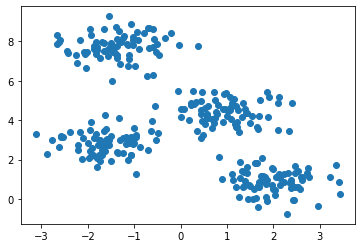

In [5]:
plt.scatter(X[:,0], X[:,1])

### Selection of eps (i.e epsilon)
#### NearestNeighbors
 - Calculate the distance from each point to its closest neighbour using the NearestNeighbors. 
 - The point itself is included in n_neighbors. 
 - The kneighbors method returns two arrays, one which contains the distance to the closest n_neighbors points and the other which contains the index for each of those points.

In [6]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

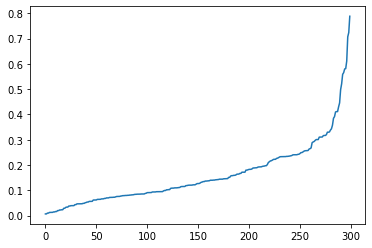

In [7]:
#sort and plot results

distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)

#### The optimal value for epsilon will be found at the point of maximum curvature.

In [11]:
#selecting 0.3 for eps and setting min_samples to 5

m = DBSCAN(eps=0.3, min_samples=5)
m.fit(X)

DBSCAN(eps=0.3)

In [12]:
#The labels_ property contains the list of clusters and their respective points.

clusters = m.labels_

In [13]:
len(clusters)

300

In [14]:
uniq_vals = np.unique(clusters)
uniq_vals

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [15]:
len(uniq_vals)

12

In [16]:
#Map every individual cluster to a color

# colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan',
#           'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan',
          'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy','red','yellow']

In [17]:
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

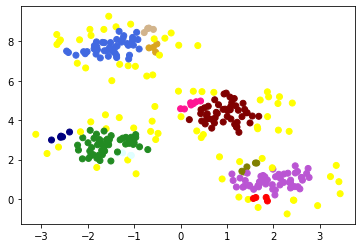

In [18]:
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))

In [19]:
cvec = [colors[label] for label in clusters] 

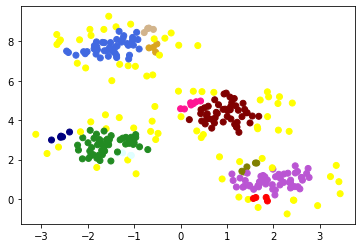

In [20]:
plt.scatter(X[:,0], X[:,1], c=cvec)